### Code Examples for Unit 22

### Example 22.1: Various ways of generating and plotting a 1-D signal 

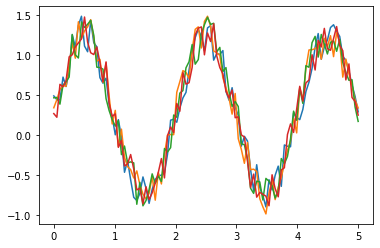

In [1]:
from math import sin, pi
from random import random
from numpy import linspace, zeros, array, asarray
from pylab import plot, show

# one of the not-so-great "features" of python is that it often has many
# equivalent ways of doing things. This illustrates four ways of plotting 
# x versus y that all work - pick your favorite

# make array for independent variable t
t0 = 0.0
t1 = 5.0
N = 100
ts = linspace(t0, t1, N)

# parameters for functional form
P = 2.0
om = 2.0*pi/P
a = 0.5

################################################################################
# plotting, method 1
# make list, plot list versus array 
v = []
for t in ts:
    v.append(sin(om*t) + a*random())
plot(ts,v)

################################################################################
# plotting, method 2
# make list, then convert to array, plot two arrays
v = []
for t in ts:
    v.append(sin(om*t) + a*random())
# then convert list to array
vs = asarray(v)
plot(ts,vs)

################################################################################
# plotting method 3 - create two arrays from the start
vs = zeros(len(ts),float)
for i in range(len(ts)):
    vs[i] = sin(om*ts[i]) + a*random()
plot(ts,vs)

################################################################################
# method 4 make list using range, convert to array and reassign values
vl = range(len(ts))
vs = array(vl,float)
for i in range(len(ts)):
    vs[i] = sin(om*ts[i]) + a*random()
plot(ts,vs)

show()


### Example 22.2: Plotting the Weights for Two Filters

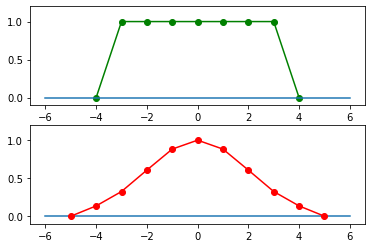

In [2]:
from math import sin, pi, exp
from random import random
from numpy import linspace, zeros, array, asarray, arange
from pylab import plot, show, ylim, subplot

def plot_boxcar(di):
    # filter shape - doesn't have to be normalized    
    w = zeros((2*di + 1), float)
    for i in range(0,2*di+1,1):
        w[i] = 1.0
    wex = zeros(len(w)+2,float)
    for i in range(len(w)):
        wex[i+1] = w[i]
    xs = arange(len(wex)) - float(di) -1
    plot(xs,wex,'go')
    plot(xs,wex,'g-')

def plot_gauss(di):
    # filter shape - doesn't have to be normalized    
    w = zeros((2*di + 1), float)
    for i in range(0,2*di+1,1):
        x = 2.0*float(i - di)/float(di)
        w[i] = exp(-x*x/2.0)
    wex = zeros(len(w)+2,float)
    for i in range(len(w)):
        wex[i+1] = w[i]
    xs = arange(len(wex)) - float(di) -1
    plot(xs,wex,'ro')
    plot(xs,wex,'r-')

ts = range(-6,6+1,1)
xs = zeros(len(ts),float)
subplot(2,1,2)
plot(ts,xs)
plot_gauss(4)
ylim(-0.1,1.2)

subplot(2,1,1)
plot_boxcar(3)
plot(ts,xs)
ylim(-0.1,1.2)
show()


### Example 22.3: Smoothing with a Boxcar Filter

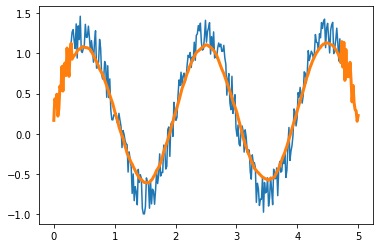

In [3]:
from math import sin, pi
from random import random
from numpy import linspace, zeros, array, asarray
from pylab import plot, show

#filter size
di = 18 #full boxcar filter width is 2*this + 1

# make array for independent variable t
t0 = 0.0
t1 = 5.0
N = 300
ts = linspace(t0, t1, N)

# parameters for functional form
P = 2.0
om = 2.0*pi/P
a = 0.5

# plot with two arrays
vs = zeros(N,float)
for i in range(N):
    vs[i] = sin(om*ts[i]) + a*random()
plot(ts,vs)

# now boxcar filter vs
svs = zeros(N,float)
w = 1.0/(2.0*float(di) + 1.0) #normalized weighting

for i in range(di, N-di, 1):
    for j in range(-di, di+1, 1):
        svs[i] += w*vs[i+j]
# handle ends of range - in this case, just set equal to unfiltered data
for i in range(0,di,1):
    svs[i] = vs[i]
for i in range(N-di,N,1):
    svs[i] = vs[i]

plot(ts,svs, linewidth=3) 
show()


### Example 22.4: Same thing using a User-defined Function

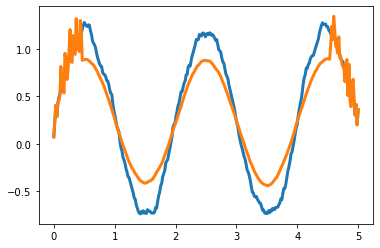

In [4]:
from math import sin, pi
from random import random
from numpy import linspace, zeros, array, asarray
from pylab import plot, show

def boxcar(f,di):
    N = len(f)
    s = zeros(N,float)
    w = 1.0/(2.0*float(di) + 1.0) #normalized weighting
    for i in range(di, N-di, 1):
        for j in range(-di, di+1, 1):
            s[i] += w*f[i+j]
    for i in range(0,di,1):
        s[i] = f[i]
    for i in range(N-di,N,1):
        s[i] = f[i]
    return s

# make array for independent variable t
t0 = 0.0
t1 = 5.0
N = 300
ts = linspace(t0, t1, N)

# parameters for functional form
P = 2.0
om = 2.0*pi/P
a = 0.5

# plotting with two arrays
vs = zeros(N,float)
for i in range(N):
    vs[i] = sin(om*ts[i]) + a*random()
#plot(ts,vs)

# now boxcar filter vs
svs = boxcar(vs,4)
plot(ts,svs, linewidth=3) 

svs = boxcar(vs,28)
plot(ts,svs, linewidth=3) 
show()



### Example 22.5: Smoothing with a Tapered Boxcar Filter

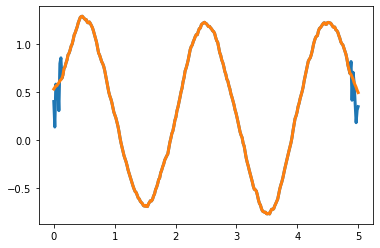

In [5]:
from math import sin, pi
from random import random
from numpy import linspace, zeros, array, asarray
from pylab import plot, show

def boxcar(f,di):
    N = len(f)
    s = zeros(N,float)
    w = 1.0/(2.0*float(di) + 1.0) #normalized weighting
    for i in range(di, N-di, 1):
        for j in range(-di, di+1, 1):
            s[i] += w*f[i+j]
    for i in range(0,di,1):
        s[i] = f[i]
    for i in range(N-di,N,1):
        s[i] = f[i]
    return s

def boxcar_tapered(f,di):
    N = len(f)
    s = zeros(N,float)
    w = 1.0/(2.0*float(di) + 1.0) #normalized weighting
    for i in range(di, N-di, 1):
        for j in range(-di, di+1, 1):
            s[i] += w*f[i+j]
    # at end of range, taper down
    for i in range(0,di,1):
        di2 = i
        w = 1.0/float(di2+di+1) #change normalization since number of points has changed
        for j in range(-di2, di+1, 1):
            s[i] += w*f[i+j]
    for i in range(N-di,N,1):
        di2 = N -1 - i
        w = 1.0/float(di+di2+1)
        for j in range(-di, di2+1, 1):
            s[i] += w*f[i+j]
    return s

# make array for independent variable t
t0 = 0.0
t1 = 5.0
N = 300
ts = linspace(t0, t1, N)

# parameters for functional form
P = 2.0
om = 2.0*pi/P
a = 0.5

# plotting with two arrays
vs = zeros(N,float)
for i in range(N):
    vs[i] = sin(om*ts[i]) + a*random()
#plot(ts,vs)

# now boxcar filter vs
svs = boxcar(vs,4)
#plot(ts,svs, linewidth=3) 

svs = boxcar(vs,8)
plot(ts,svs, linewidth=3) 

svs = boxcar_tapered(vs,8)
plot(ts,svs, linewidth=3) 
show()


### Example 22.6: Smoothing with a Boxcar or a Gaussian

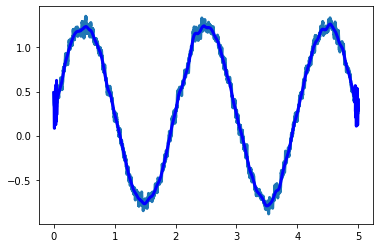

In [6]:
from math import sin, pi, exp
from random import random
from numpy import linspace, zeros, array, asarray
from pylab import plot, show

def boxcar(f,di):
    N = len(f)
    s = zeros(N,float)
    w = 1.0/(2.0*float(di) + 1.0) #normalized weighting
    for i in range(di, N-di, 1):
        for j in range(-di, di+1, 1):
            s[i] += w*f[i+j]
    for i in range(0,di,1):
        s[i] = f[i]
    for i in range(N-di,N,1):
        s[i] = f[i]
    return s

def gaussf(f,di):
    
    w = zeros((2*di + 1), float)
    nrm = 0.0
    for i in range(0,2*di+1,1):
        x = 2.0*float(i - di)/float(di)
        w[i] = exp(-x*x/2.0)
        nrm += w[i]
    # normalize weights
    w /= nrm

    N = len(f)
    s = zeros(N,float)
    for i in range(di, N-di, 1):
        for j in range(-di, di+1, 1):
            s[i] += w[j+di]*f[i+j]
    for i in range(0,di,1):
        s[i] = f[i]
    for i in range(N-di,N,1):
        s[i] = f[i]
    return s

################ plot data + filtered version for comparison ################

# make array for independent variable t
t0 = 0.0
t1 = 5.0
N = 3000
ts = linspace(t0, t1, N)

# parameters for functional form
P = 2.0
om = 2.0*pi/P
a = 0.5

# plotting with two arrays
vs = zeros(N,float)
for i in range(N):
    vs[i] = sin(om*ts[i]) + a*random()
#plot(ts,vs,'r-')

# now boxcar filter vs
svs = boxcar(vs,4)
plot(ts,svs, linewidth=3) 

svs = gaussf(vs,32)
plot(ts,svs,'b-',linewidth=3) 

show()


### Example 22.7: Testing the Derivative or Edge Detection Filter

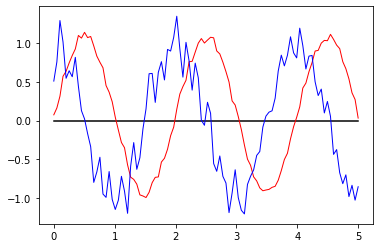

In [7]:
from math import sin, pi, exp
from random import random
from numpy import linspace, zeros, array, asarray
from pylab import plot, show

def edgetf(f,h,om):
    # filter shape - doesn't have to be normalized    
    w = zeros(3, float)
    w[0] = -1.0
    w[1] = 0.0
    w[2] = 1.0

    # now filter the data, normalizing at the end
    N = len(f)
    s = zeros(N,float)
    for i in range(0, N, 1):
        for j in range(-1, 2, 1):
            if ((i+j) >= 0) and ((i+j) < N):
                s[i] += w[j+1]*f[i+j]

    s /= (2.0*h)*om 
    return s

################ plot data + filtered version for comparison ################

# make array for independent variable t
t0 = 0.0
t1 = 5.0
N = 100
ts = linspace(t0, t1, N)

# parameters for functional form
P = 2.0
om = 2.0*pi/P
a = 0.15

# plot horizontal line
zs = zeros(N,float)
plot(ts,zs,'k-')

# plotting with two arrays
vs = zeros(N,float)
for i in range(N):
    vs[i] = sin(om*ts[i]) + a*random()
plot(ts,vs, 'r-', linewidth=1) 

h = ts[1]-ts[0]
svs = edgetf(vs,h,om)
plot(ts,svs,'b-',linewidth=1) 

show()


### Example 22.8: Make and Filter a 2D Image

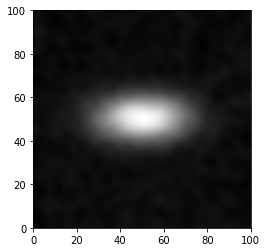

In [8]:
from math import sin, cos, pi, exp, sqrt
from random import random
from numpy import linspace, zeros, array, asarray
from pylab import plot, show, imshow, gray

def gaussf_img(img,di):

    side = img.shape[0] #assumed square for the moment

    # filter shape - doesn't have to be normalized    
    wd = 2*di + 1
    w = zeros([wd,wd], float)

    for i in range(0,wd,1):
        for j in range(0,wd,1):
            x = 2.0*float(i - di)/float(di)
            y = 2.0*float(j - di)/float(di)
            w[i,j] = exp(-(x*x+y*y)/2.0)

    N = side
    simg = zeros([N,N],float)
    if 1:
        for i in range(0, N, 1):       # for every x
            for m in range(0, N, 1):   # for every y
                wt = 0.0
                for j in range(-di, di+1, 1):       # convolve along x axis
                    for n in range(-di, di+1, 1):   # convolve along y axis
                        if ((i+j) >= 0) and ((i+j) < N) and ((m+n) >= 0) and ((m+n) < N):
                            simg[i,m] += w[j+di,n+di]*img[i+j,m+n]
                            wt += w[j+di,n+di]
                simg[i,m] = simg[i,m]/wt
    return simg

################ plot img or filtered version ################

Px = 120.0
omx = 2.0*pi/Px
Py = 80.0
omy = 2.0*pi/Py
a = 0.3
b = 50.0

side = 100
img =  zeros([side,side],float)

if 1:
    for i in range(side):
        for j in range(side):
            c = float(side)/2.0
            r = sqrt((i - c)*(i - c) + (j - c)*(j - c)/4.0)
            img[i,j] = exp(-r*r/2.0/b) + a*random()
#img[49,49] = 1000.0
imshow(img,origin="lower",extent=[0,side,0,side])

#now filter in 2-D
simg = gaussf_img(img,4)
imshow(simg,origin="lower",extent=[0,side,0,side])

gray()
show()


### Example 22.9: Segment an Image based on the Pixel Values

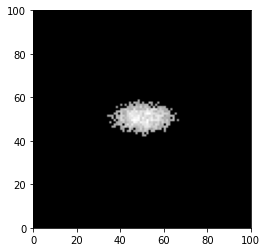

In [9]:
from math import sin, cos, pi, exp, sqrt
from random import random
from numpy import linspace, zeros, array, asarray, ravel
from pylab import plot, show, imshow, gray, hist

def gaussf_img(img,di):

    side = img.shape[0] #assumed square for the moment

    # filter shape - doesn't have to be normalized    
    wd = 2*di + 1
    w = zeros([wd,wd], float)

    for i in range(0,wd,1):
        for j in range(0,wd,1):
            x = 2.0*float(i - di)/float(di)
            y = 2.0*float(j - di)/float(di)
            w[i,j] = exp(-(x*x+y*y)/2.0)

    N = side
    simg = zeros([N,N],float)
    if 1:
        for i in range(0, N, 1):       # for every x
            for m in range(0, N, 1):   # for every y
                wt = 0.0
                for j in range(-di, di+1, 1):       # convolve along x axis
                    for n in range(-di, di+1, 1):   # convolve along y axis
                        if ((i+j) >= 0) and ((i+j) < N) and ((m+n) >= 0) and ((m+n) < N):
                            simg[i,m] += w[j+di,n+di]*img[i+j,m+n]
                            wt += w[j+di,n+di]
                simg[i,m] = simg[i,m]/wt
    return simg

def edgef_img(img): #assumes a 3x3 filter size

    di = 1
    side = img.shape[0] #assumed square for the moment

    # filter shape - doesn't have to be normalized    
    wd = 2*di + 1
    w = zeros([wd,wd], float)

    for i in range(0,wd,1):
        for j in range(0,wd,1):
            w[i,j] = -1.0/8.0
    w[1,1] = 1.0

    N = side
    simg = zeros([N,N],float)
    if 1:
        for i in range(0, N, 1):       # for every x
            for m in range(0, N, 1):   # for every y
                wt = 0.0
                for j in range(-di, di+1, 1):       # convolve along x axis
                    for n in range(-di, di+1, 1):   # convolve along y axis
                        if ((i+j) >= 0) and ((i+j) < N) and ((m+n) >= 0) and ((m+n) < N):
                            simg[i,m] += w[j+di,n+di]*img[i+j,m+n]
                            wt += w[j+di,n+di]
                if abs(wt) > 1e-5: 
                    simg[i,m] = simg[i,m]/wt
    return simg

def im_hist(img):
    px = ravel(img)
    mean = sum(px)/len(px)
    pxc = px - mean
    stddev = sqrt(sum(pxc*pxc)/len(px))
    n, bins, patches = hist(px, 30, normed=0, histtype='stepfilled')
    lx = [mean, mean]
    ly = [0,max(px)]
    plot(lx,ly)
    show()

def im_seg(img,n): #finds pixel values n away from mean
    side = img.shape[0]
    px = ravel(img)
    mean = sum(px)/len(px)
    pxc = px - mean
    stddev = sqrt(sum(pxc*pxc)/len(px))
    seg = zeros([side,side],float)
    for i in range(side):
        for j in range(side):
            if (abs(img[i,j] - mean) > n*stddev):
                seg[i,j] = 1.0
    return seg                

def im_mask(img,msk,n): #saves pixels w. value close to n

    side = img.shape[0]
    outp = zeros([side,side],float)
    for i in range(side):
        for j in range(side):
            if(abs(msk[i,j]- n) < 1e-5):
                outp[i,j] = img[i,j]
    return outp                

def im_antimask(img,msk,n): #saves pixels w. value close to n

    side = img.shape[0]
    outp = zeros([side,side],float)
    for i in range(side):
        for j in range(side):
            if(abs(msk[i,j]- n) > 1e-5):
                outp[i,j] = img[i,j]
    return outp                

################ plot img or filtered version ################

Px = 120.0
omx = 2.0*pi/Px
Py = 80.0
omy = 2.0*pi/Py
a = 0.3
b = 50.0

side = 100
img =  zeros([side,side],float)

if 1:
    for i in range(side):
        for j in range(side):
            c = float(side)/2.0
            r = sqrt((i - c)*(i - c) + (j - c)*(j - c)/4.0)
            img[i,j] = exp(-r*r/2.0/b) + a*random()

#img[49,49] = 1000.0
#imshow(img,origin="lower",extent=[0,side,0,side])

#im_hist(img)

#now filter in 2-D
simg = gaussf_img(img,4)
#imshow(simg,origin="lower",extent=[0,side,0,side])

#now find regions
seg = im_seg(img,3)
#imshow(seg,origin="lower",extent=[0,side,0,side])

#now find edge
#edg = edgef_img(seg)

#now segment edge image into discrete regions
#seg2 = im_seg(edg,1.5)

#show resulting boundary
#imshow(seg2,origin="lower",extent=[0,side,0,side])

# could also mask out background
cutimg = im_mask(img, seg, 1.0)
imshow(cutimg,origin="lower",extent=[0,side,0,side])

# could also mask out object
#cutimg = im_antimask(img, seg, 1.0)
#imshow(cutimg,origin="lower",extent=[0,side,0,side])

#gray()
show()
